In [39]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [40]:
df = pd.read_csv("../Archivos/profesionales.csv", index_col= 0)

In [41]:
lista_max_sueldo = df[(df['genero']=='Otros') & (df['salario']>1000000)].index.tolist()

In [42]:
df.drop(lista_max_sueldo,axis = 0,inplace = True)

In [43]:
df.salario.isnull().sum()*100/df.shape[0]

10.432555160971066

## OUTLIERS

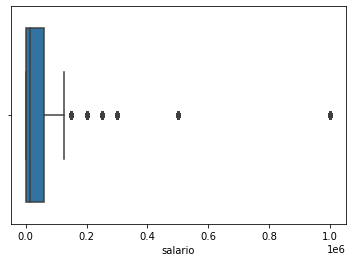

In [44]:
sns.boxplot(x= "salario", data=df)
plt.show()

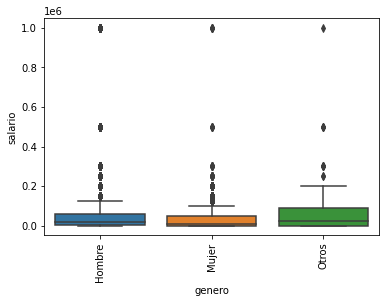

In [45]:
sns.boxplot(x = "genero", y = "salario", data = df)
plt.xticks(rotation = 90);

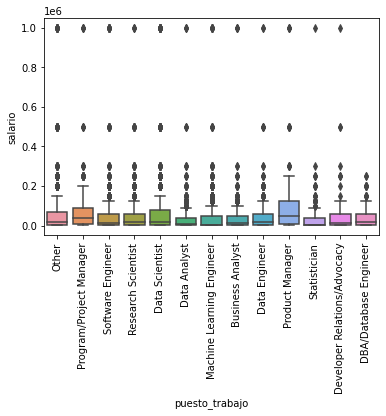

In [46]:
sns.boxplot(x = "puesto_trabajo", y = "salario", data = df)
plt.xticks(rotation = 90);

In [47]:
def detectar_outliers(dataframe):
    lista_columnas = list(dataframe.select_dtypes(include= np.number).columns)
    # creamos un diccionario donde almacenaremos índices de los outliers
    dicc_indices = {} 
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    return dicc_indices

In [48]:
# Ejecutamos la función y guardamos la lista de indices
#indices_outliers = detectar_outliers(df)
#Decidimos no quitar los outliers ya que normaliza demasiado los datos del salarío y el análisis de este no es representativo


In [49]:
def reemp_nulos_num_KNN(dataf):
    # Primero sacamos las variables numéricas con select_dtypes
    num = dataf.select_dtypes(include = np.number)
    # Iniciamos el KNNimputer
    imputerKNN = KNNImputer(n_neighbors=5)
    # Aplicamos el imputer a las variables numericas
    imputerKNN.fit(num)
    # Transformamos los datos para que se transformen los nulos, y como nos devuelve un array
    # lo transformamos directamente en dataframe
    knn_num = imputerKNN.transform(num)
    df_knn = pd.DataFrame(imputerKNN.transform(num), columns = num.columns)
    # Sacamos el nombre de las columnas del data sin nulos
    columnas = df_knn.columns
    # Utilizando esta lista de columnas, eliminamos estas del dataframe
    dataf.drop(columnas, axis= 1, inplace = True)
    # creamos nuevas columnas en el dataframe original, basándonos en estas columnas numericas sin nulos
    dataf[columnas] = knn_num
    # Nos devuelve la suma de nulos del dataframe, para comprobar que se hayan borrado los nulos
    return dataf.isnull().sum()

In [50]:
reemp_nulos_num_KNN(df)

edad                                           0
genero                                         0
pais                                           0
estudios                                       0
puesto_trabajo                                 0
experiencia                                    0
lenguaje_recomendado                         963
experiencia_ML                              1444
industria                                    858
tamaño_empresa                               932
herramienta_DA                              3755
lenguaje_utilizado                           962
IDE                                          966
herramientas_visualizacion                  1365
Q16_frame_ml                                3731
Q17_alg_ml                                  3825
Q32_prod_bigdata                            7696
Q34_herramientas_bi                         7781
Q28                                        14051
q10_notebooks                               1022
q39_plat_compartir_t

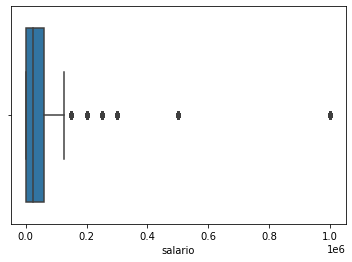

In [51]:
sns.boxplot(x= "salario", data=df)
plt.show()

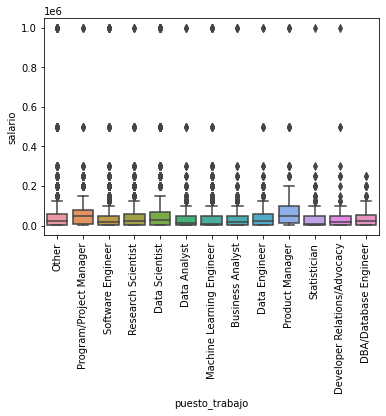

In [52]:
sns.boxplot(x = "puesto_trabajo", y = "salario", data = df)
plt.xticks(rotation = 90);

In [53]:
df.head()

,edad,genero,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q28,q10_notebooks,q39_plat_compartir_trabajo,q40_plat_cursos,q27_plat_familiar_cloud_computing,q29b_productos_familiar_cloud_computing,q31b_productos_familiar_ml,q32b_productos_familiar_bd,q34b_herramientas_familiar_bi,q36b_cat_herramientas_familiar_ml,q37b_cat_herramientas_familiar_ml_aut,q38b_herramientas_familiar_gest_exp_ml,salario
0,50-54,Hombre,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0
1,50-54,Hombre,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN,"Kaggle Notebooks,Colab Notebooks",NaN,"Kaggle Learn Courses,Cloud-certification progr...","Google Cloud Platform (GCP) , Oracle Cloud",Google Cloud Compute Engine,None,"MySQL ,SQLite ,Oracle Database ,Google Cloud SQL","Google Data Studio,Qlik","Automated model selection (e.g. auto-sklearn, ...",Google Cloud AutoML,None,70000.0
2,22-24,Hombre,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees","Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,NaN,"MySQL , MongoDB",None,NaN,Kaggle Notebooks,I do not share my work publicly,DataCamp,"Amazon Web Services (AWS) , Google Cloud Plat...","Microsoft Azure Virtual Machines , Google Clo...","Azure Machine Learning Studio , Google Cloud ...","MySQL ,PostgreSQL ,MongoDB","Microsoft Power BI,Tableau","Automated model selection (e.g. auto-sklearn, ...",DataRobot AutoML,TensorBoard,1000.0
3,45-49,Hombre,Mexico,Doctoral degree,Research Scientist,20+ years,Python,5-10 years,Academics/Education,"1000-9,999 employees","Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",NaN,NaN,NaN,Colab Notebooks,NaN,"Coursera,edX","Amazon Web Services (AWS) , Microsoft Azure","Microsoft Azure Virtual Machines , Google Clo...",None,None,None,None,NaN,None,40000.0
4,45-49,Hombre,India,Doctoral degree,Other,< 1 years,Python,10-20 years,Academics/Education,50-249 employees,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",None,Microsoft Power BI,NaN,Google Cloud Datalab,I do not share my work publicly,"Kaggle Learn Courses,Udemy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.0


In [54]:
df.to_csv("../Archivos/profesionales_nonull.csv") 